In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chaturvedi","key":"656c5469058e3eb60d5fce571b626975"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           5473        134  1.0              
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25          11311        396  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           5747        115  1.0              
evangower/premier-league-2022-2023                             Pr

In [4]:
!kaggle competitions download -c instant-gratification
! mkdir instant-gratification

 99% 408M/414M [00:04<00:00, 100MB/s] 
100% 414M/414M [00:04<00:00, 88.6MB/s]


In [6]:
! unzip instant-gratification.zip 

Archive:  instant-gratification.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 

#### Import the training and test datasets

In [12]:
#train = pd.read_csv('/kaggle/input/instant-gratification/train.csv')
train = pd.read_csv('train.csv')

train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [ ]:
# test = pd.read_csv('/kaggle/input/instant-gratification/test.csv') #Kaggle
test = pd.read_csv('test.csv')  # Colab
test.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,ba88c155ba898fc8b5099893036ef205,-0.155789,0.761549,1.156785,-0.272358,-1.302155,1.560988,-1.815729,-0.702968,0.435537,...,-4.207352,0.404394,0.695667,0.515584,1.339533,2.005131,-1.832629,-0.454067,-0.204909,-0.314752
1,7cbab5cea99169139e7e6d8ff74ebb77,-4.528525,-0.158527,0.616473,-0.172137,1.255351,0.064565,-1.124906,-1.826855,-1.429915,...,-0.219057,-1.473936,-1.230680,2.064435,-0.297421,-0.499721,0.138128,-1.674848,-2.368582,0.185971
2,7baaf361537fbd8a1aaa2c97a6d4ccc7,1.807488,-0.673261,0.526273,0.175929,-0.447282,-0.506135,0.080836,0.371687,-5.816214,...,-4.333965,1.213142,0.639393,0.595109,-1.492298,0.892696,2.198806,0.132664,-0.355048,0.055225
3,2e1350fe94ec9f2220bec5245e5e9265,0.972763,0.631843,0.854640,-0.040372,1.544211,-0.613590,0.742637,-0.742686,-0.192597,...,-0.272967,0.501091,0.059636,-0.815263,1.898444,-1.613323,1.755354,0.066935,0.523591,-0.790499
4,626ce222351b68b259f73de172f11249,0.092803,-0.927249,0.601406,-0.136351,-0.439235,1.734636,-2.403782,0.157426,1.147346,...,-0.211730,0.045831,-0.346738,0.558668,-1.985189,-1.011715,1.555390,0.514802,-0.886653,0.655927


In [ ]:
train.info(max_cols=258)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Data columns (total 258 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    id                                          262144 non-null  object 
 1    muggy-smalt-axolotl-pembus                  262144 non-null  float64
 2    dorky-peach-sheepdog-ordinal                262144 non-null  float64
 3    slimy-seashell-cassowary-goose              262144 non-null  float64
 4    snazzy-harlequin-chicken-distraction        262144 non-null  float64
 5    frumpy-smalt-mau-ordinal                    262144 non-null  float64
 6    stealthy-beige-pinscher-golden              262144 non-null  float64
 7    chummy-cream-tarantula-entropy              262144 non-null  float64
 8    hazy-emerald-cuttlefish-unsorted            262144 non-null  float64
 9    nerdy-indigo-wolfhound-sorted               262144 non-nu

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Columns: 257 entries, id to gamy-white-monster-expert
dtypes: float64(255), int64(1), object(1)
memory usage: 257.0+ MB


In [ ]:
train.isna().sum().any() , test.isna().any().any()

(False, False)

#### No NUll values 

In [ ]:
train[train.duplicated()]

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target


In [ ]:
train.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,...,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.005924,0.000936,-0.012530,-0.005688,0.001607,0.007878,-0.003500,-0.005927,0.002664,0.020485,...,-0.002670,-0.011401,0.007895,0.000651,-0.002613,0.002351,-0.011684,-0.007153,-0.004066,0.500225
std,1.706660,1.720943,1.698693,1.874875,1.726869,1.734646,1.720431,1.693276,1.872248,1.645070,...,1.799308,1.788832,1.775853,1.703296,1.692972,1.742284,1.698231,1.759408,1.661463,0.500001
min,-15.588429,-15.644144,-15.235982,-15.672966,-16.800626,-14.789422,-15.591329,-15.696478,-17.011807,-14.693510,...,-16.740804,-17.681945,-15.705197,-15.765274,-15.604682,-16.965775,-15.064518,-16.145154,-16.815640,0.000000
25%,-0.765405,-0.770224,-0.777421,-0.802502,-0.770838,-0.771608,-0.770634,-0.764398,-0.795475,-0.756594,...,-0.782944,-0.788437,-0.778580,-0.767367,-0.764199,-0.770457,-0.768885,-0.785702,-0.766552,0.000000
50%,0.002148,0.003543,-0.005771,-0.003505,0.000865,0.002830,0.001257,-0.003657,0.004936,0.004372,...,-0.002239,-0.004544,-0.000675,0.000770,-0.000331,-0.000617,-0.005633,-0.004459,-0.004471,1.000000
75%,0.769228,0.773400,0.764092,0.798460,0.769954,0.776606,0.769794,0.752836,0.800376,0.764807,...,0.786180,0.776177,0.788910,0.769277,0.764115,0.773100,0.753518,0.774197,0.758012,1.000000
max,15.797000,18.577178,17.205310,16.585173,16.815798,17.378922,15.202100,16.645394,19.396192,17.131375,...,15.511936,16.252503,16.387990,16.260286,14.748128,16.212146,18.866005,18.811832,17.302211,1.000000


#### Check the distribution of the target variable

In [ ]:
train['target'].value_counts()

1    131131
0    131013
Name: target, dtype: int64

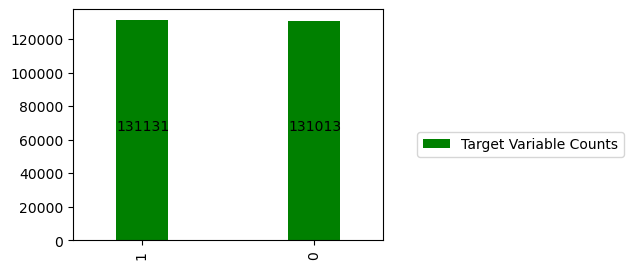

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(4,3))
train['target'].value_counts().plot(kind='bar',color='g',ax=ax, label='Target Variable Counts', width=0.3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 0.5))
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5))
plt.show()

##### ALmost 50-50 % distribution of Target variable

### Standardize the data

In [ ]:
train_stand = train.copy().drop(columns='target')
test_stand = test.copy()

train_stand.shape, test_stand.shape

((262144, 257), (131072, 257))

In [ ]:
train_stand.dtypes

id                                       object
muggy-smalt-axolotl-pembus              float64
dorky-peach-sheepdog-ordinal            float64
slimy-seashell-cassowary-goose          float64
snazzy-harlequin-chicken-distraction    float64
                                         ...   
jumpy-thistle-discus-sorted             float64
muggy-turquoise-donkey-important        float64
blurry-buff-hyena-entropy               float64
bluesy-chocolate-kudu-fepid             float64
gamy-white-monster-expert               float64
Length: 257, dtype: object

In [ ]:
features = train_stand.columns.drop('id')
features

Index(['muggy-smalt-axolotl-pembus', 'dorky-peach-sheepdog-ordinal',
       'slimy-seashell-cassowary-goose',
       'snazzy-harlequin-chicken-distraction', 'frumpy-smalt-mau-ordinal',
       'stealthy-beige-pinscher-golden', 'chummy-cream-tarantula-entropy',
       'hazy-emerald-cuttlefish-unsorted', 'nerdy-indigo-wolfhound-sorted',
       'leaky-amaranth-lizard-sorted',
       ...
       'goopy-lavender-wolverine-fimbus', 'wheezy-myrtle-mandrill-entropy',
       'wiggy-lilac-lemming-sorted', 'gloppy-cerise-snail-contributor',
       'woozy-silver-havanese-gaussian', 'jumpy-thistle-discus-sorted',
       'muggy-turquoise-donkey-important', 'blurry-buff-hyena-entropy',
       'bluesy-chocolate-kudu-fepid', 'gamy-white-monster-expert'],
      dtype='object', length=256)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_stand = pd.DataFrame(sc.fit_transform(train_stand[features]),columns=features)
train_stand.head()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,-1.216752,0.591086,0.141976,0.460249,0.029339,0.128225,-3.709305,0.262979,-0.387027,-0.150457,...,1.397478,0.197057,0.352312,-0.873001,0.350805,0.362895,0.388239,0.152360,-0.454429,-0.114106
1,-0.291579,0.047479,0.000787,0.574415,-0.201494,-0.051934,0.066308,-0.222319,-0.124067,0.464112,...,-0.655710,-0.357052,-0.690222,1.467163,-0.281992,0.935577,0.533156,0.096348,-0.431647,0.287950
2,-0.988129,0.499490,-0.626168,0.397793,2.129198,0.161808,0.301887,0.547175,-0.654797,-0.638433,...,0.482220,0.288496,0.079338,-0.263032,1.190373,-0.053962,-0.126630,-0.089183,-0.490584,0.040991
3,0.104210,0.533544,-0.550088,0.492930,0.498401,0.661467,0.531615,0.335755,-0.722314,-0.731407,...,-1.070720,-0.648193,0.780673,-0.203240,1.946523,-0.308024,-0.457262,2.324806,0.392259,-1.515020
4,-0.122964,-0.103541,0.224058,-0.371029,-0.640465,0.419615,0.521831,-0.809025,-2.749432,-1.257818,...,0.563910,-0.153669,0.869707,1.662208,0.963164,-0.075728,-0.153042,-0.433973,0.552102,0.054859


In [ ]:
test_stand = pd.DataFrame(sc.fit_transform(test_stand[features]),columns=features)
test_stand.head()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,-0.107774,0.402793,0.725953,-0.150927,-0.749770,0.955882,-1.117797,-0.374602,0.210771,0.698101,...,-2.100916,0.226379,0.393933,0.286913,0.796085,1.375312,-1.024022,-0.240540,-0.119311,-0.195221
1,-2.821365,-0.088970,0.397048,-0.092992,0.712602,0.030869,-0.691484,-0.992201,-0.672384,-0.441337,...,-0.101528,-0.793408,-0.703351,1.160271,-0.174951,-0.345532,0.076416,-0.892686,-1.488645,0.135855
2,1.110578,-0.364085,0.342140,0.108217,-0.260957,-0.321908,0.052590,0.215944,-2.748977,0.181799,...,-2.164389,0.665467,0.361878,0.331755,-0.883748,0.611064,1.227064,0.072893,-0.214330,0.049407
3,0.592572,0.333468,0.542028,-0.016822,0.877771,-0.388332,0.460994,-0.396428,-0.086605,0.093313,...,-0.128554,0.278878,0.031637,-0.463517,1.127629,-1.110582,0.979448,0.037781,0.341738,-0.509783
4,0.046495,-0.499837,0.387876,-0.072305,-0.256356,1.063223,-1.480690,0.098203,0.547760,1.221373,...,-0.097855,0.031707,-0.199841,0.311207,-1.176129,-0.697275,0.867791,0.277033,-0.550770,0.446589


### Create a train and test splits

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_stand, train['target'], test_size=0.3, random_state=10)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((183500, 256), (183500,), (78644, 256), (78644,))

### Build a Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics  

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
y_compare= pd.DataFrame({'y_test': Y_test, 'y_pred': y_pred})
y_compare.head(10)

,y_test,y_pred
220963,0,1
33559,1,1
247791,1,0
71429,1,1
197685,1,0
251826,1,1
243196,1,1
121422,0,1
181381,1,0
148292,1,0


#### Predicted Probability of 0 and 1 


In [ ]:
y_prob = logreg.predict_proba(X_test)
print(y_prob.shape)
y_prob[0:5]

(78644, 2)


array([[0.48569415, 0.51430585],
       [0.47438674, 0.52561326],
       [0.50334013, 0.49665987],
       [0.48665818, 0.51334182],
       [0.54529554, 0.45470446]])

#### Check Model Performance

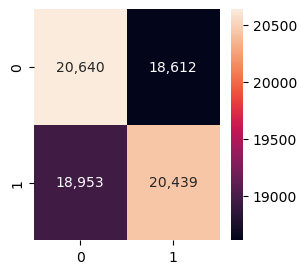

              precision    recall  f1-score   support

           0       0.52      0.53      0.52     39252
           1       0.52      0.52      0.52     39392

    accuracy                           0.52     78644
   macro avg       0.52      0.52      0.52     78644
weighted avg       0.52      0.52      0.52     78644



In [ ]:
fig, ax = plt.subplots(figsize= (3,3))
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),ax=ax, annot=True, fmt='2,.0f')
plt.show()
print(metrics.classification_report(Y_test,y_pred))

In [ ]:
#Check Model performance
print(f'Logistic Regression Model accuracy is : {round(metrics.accuracy_score(Y_test,y_pred) * 100 , 2)} %')
print('Logistic Regression Model Precision is :' ,round(metrics.precision_score(Y_test,y_pred) * 100 , 2),'%')
print('Logistic Regression recall_score is :' ,round(metrics.recall_score(Y_test,y_pred) * 100 , 2),'%')
print('Logistic Regression f1_score  is :' ,round(metrics.f1_score(Y_test,y_pred) * 100 , 2),'%')

Logistic Regression Model accuracy is : 52.23 %
Logistic Regression Model Precision is : 52.34 %
Logistic Regression recall_score is : 51.89 %
Logistic Regression f1_score  is : 52.11 %


In [ ]:
score_logreg = logreg.score(X_test, Y_test)
print(f'Test Score : {round(score_logreg,2) * 100 } %')

Test Score : 52.0 %


### Logistic Regression performance is really bad with only 52.23% Accuracy

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =20)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_compare= pd.DataFrame({'y_test': Y_test, 'y_pred': y_pred})
y_compare.head(10)

,y_test,y_pred
220963,0,1
33559,1,0
247791,1,0
71429,1,1
197685,1,1
251826,1,1
243196,1,0
121422,0,1
181381,1,0
148292,1,0


In [ ]:
score_rf = rf.score(X_test, Y_test)
print(f'Test Score : {round(score_rf,2) * 100 } %')

Test Score : 51.0 %


Random Forest Model accuracy is : 50.87 %
Random Forest Model Precision is : 51.16 %
Random Forest recall_score is : 42.23 %
Random Forest f1_score  is : 46.27 %


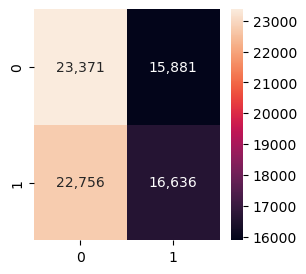

              precision    recall  f1-score   support

           0       0.51      0.60      0.55     39252
           1       0.51      0.42      0.46     39392

    accuracy                           0.51     78644
   macro avg       0.51      0.51      0.51     78644
weighted avg       0.51      0.51      0.51     78644



In [ ]:
#Check Model performance
print(f'Random Forest Model accuracy is : {round(metrics.accuracy_score(Y_test,y_pred) * 100 , 2)} %')
print('Random Forest Model Precision is :' ,round(metrics.precision_score(Y_test,y_pred) * 100 , 2),'%')
print('Random Forest recall_score is :' ,round(metrics.recall_score(Y_test,y_pred) * 100 , 2),'%')
print('Random Forest f1_score  is :' ,round(metrics.f1_score(Y_test,y_pred) * 100 , 2),'%')

fig, ax = plt.subplots(figsize= (3,3))
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),ax=ax, annot=True, fmt='2,.0f')
plt.show()
print(metrics.classification_report(Y_test,y_pred))

#### Random forest performs even worse than Logistic with 51% accuracy

In [ ]:
# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# ## Support Vector Machines


In [ ]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
score_svc = svc.score(X_test, Y_test)
print(f'Test Score : {round(score_svc,2) * 100 } %')

In [ ]:
#Check Model performance
fig, ax = plt.subplots(figsize= (3,3))
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),ax=ax, annot=True, fmt='2,.0f')
plt.show()
print(metrics.classification_report(Y_test,y_pred))